In [1]:
# CÓDIGO PARA LA OBTENCIÓN DE MADRID SALES CSV
# (base de datos sin limpiar; inicial)

!pip install rpy2

import rpy2.robjects as robjects
from rpy2.robjects import r
from rpy2.robjects import pandas2ri
pandas2ri.activate()

# Cargar el archivo y convertirlo a data.frame en R
r('load("Madrid_Sale.RData")')
r('Madrid_Sale_df <- as.data.frame(Madrid_Sale)')

# Guardar CSV directamente desde R (corregido)
r('write.csv(Madrid_Sale_df, file = "Madrid_sale.csv", row.names = FALSE)')

In [ ]:
#CORRELACION ENTRE FLOORCLEAN Y PRICE

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("/content/BBDD_FINAL.xlsx")

df_corr = df[['FLOORCLEAN', 'PRICE']].dropna()

correlacion = df_corr['FLOORCLEAN'].corr(df_corr['PRICE'])

print(f"Correlación entre FLOORCLEAN y PRICE: {correlacion:.4f}")

plt.figure(figsize=(8, 6))
sns.regplot(x='FLOORCLEAN', y='PRICE', data=df_corr, scatter_kws={'alpha':0.4})
plt.title(f'Relación entre FLOORCLEAN y PRICE (r = {correlacion:.2f})')
plt.xlabel('FLOORCLEAN (Planta)')
plt.ylabel('PRICE (€)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Limpieza de variable floorclean

import pandas as pd

df = pd.read_excel("/content/BBDD_actualizada.xlsx")  #aqui iría la BDDD con floorclea con los missingvalues, sin rellenarlos con la mediana

# 2. Rellenar FLOORCLEAN con la mediana
mediana = df['FLOORCLEAN'].median()
df['FLOORCLEAN'] = df['FLOORCLEAN'].fillna(mediana)

# 3. Verificar
print("Missing values en FLOORCLEAN:", df['FLOORCLEAN'].isnull().sum())



In [ ]:
#CORRELACIÓN ENTRE DISTANCIA A LA CASTELLANA Y PRECIO
df_corr = df[['PRICE', 'DISTANCE_TO_CASTELLANA']].dropna()
df_corr = df_corr[df_corr['DISTANCE_TO_CASTELLANA'] < 15]  # opcional si quieres filtrar extremos
correlacion = df_corr['PRICE'].corr(df_corr['DISTANCE_TO_CASTELLANA'])


import matplotlib.ticker as ticker

plt.figure(figsize=(8, 6))
sns.regplot(
    x='DISTANCE_TO_CASTELLANA',
    y='PRICE',
    data=df_corr,
    scatter_kws={'alpha': 0.3},
    line_kws={'color': 'green'}
)

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M €'))
plt.title(f'Relación entre DISTANCE_TO_CASTELLANA y PRICE (r = {correlacion:.2f})')
plt.xlabel('DISTANCIA A LA CASTELLANA (km)')
plt.ylabel('PRECIO')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#Así se creo la variable nombre de distrito en base a la variable numero de distrito que se obtuvo con la unión de las dos bases de datos con el uso de la plataforma QGIS

#Durante la fase ETL del proyecto fui depurando y transformando los datos de forma iterativa. Cada vez que aplicaba una consulta de limpieza —por ejemplo, para crear la variable número de distrito y, a
#partir de ella, la variable nombre de distrito mediante la unión de dos tablas en QGIS— descargaba de inmediato la base resultante en formato Excel. De este modo podía comprobar visualmente que las
#transformaciones se hubieran realizado correctamente y detectar posibles inconsistencias.

#Muchas variables innecesarias se eliminaron directamente en Excel, ya que suprimir una columna en ese entorno resulta rápido y sencillo. Tras cada revisión o ajuste en Excel, volvía a cargar la base
#actualizada en Google Colab para que el cuaderno trabajara siempre con la versión más reciente y consistente de los datos.

#En el repositorio se encuentra ya la base de datos final: incluye todas las transformaciones y las variables definidas, por lo que no es necesario volver a ejecutar estos pasos.



In [ ]:


import pandas as pd

# Cargar archivo
df = pd.read_excel('aqui iría la bbdd sin la variable nombre distrito y cn la variable numero edd distito')  # ajusta ruta si es distinto

# Crear diccionario de códigos y nombres de distrito
codigo_a_distrito = {
    1: "Centro",
    2: "Arganzuela",
    3: "Retiro",
    4: "Salamanca",
    5: "Chamartín",
    6: "Tetuán",
    7: "Chamberí",
    8: "Fuencarral-El Pardo",
    9: "Moncloa",
    10: "Latina",
    11: "Carabanchel",
    12: "Usera",
    13: "Puente de Vallecas",
    14: "Moratalaz",
    15: "Ciudad Lineal",
    16: "Hortaleza",
    17: "Villaverde",
    18: "Villa de Vallecas",
    19: "Vicálvaro",
    20: "San Blas",
    21: "Barajas"
}

# Mapear los nombres
df['NOMBRE_DISTRITO'] = df['DISTRITO'].map(codigo_a_distrito)

# Guardar archivo con nueva columna
output_path = '/content/viviendas_con_nombre_distrito.xlsx'
df.to_excel(output_path, index=False)

# Descargar archivo
from google.colab import files
files.download(output_path)

In [ ]:
#creacion variabe lujo y eliminacion de swimmingpool, jardin, conserje

import pandas as pd

#(aún contiene HASSWIMMINGPOOL, HASGARDEN y HASDOORMAN)
df = pd.read_excel("")  #aqui iría la bbdd sin la variable lujo y con las variables SSWIMMINGPOOL, HASGARDEN, HASDOORMAN
df["LUJO"] = (
    (df["HASSWIMMINGPOOL"] == 1) |
    (df["HASGARDEN"] == 1) |
    (df["HASDOORMAN"] == 1)
).astype(int)

# 3. Eliminar las variables que ya se han resumido en 'LUJO'
df.drop(columns=["HASSWIMMINGPOOL", "HASGARDEN", "HASDOORMAN"], inplace=True)

df = df[df["TIPO_ZONA_desconocida"] == False]
df.drop(columns=["TIPO_ZONA_desconocida"], inplace=True)

output_path = "BBDD_limpia_con_LUJO.xlsx"
df.to_excel(output_path, index=False)

# 6. Descargar en Colab
from google.colab import files
files.download(output_path)



In [ ]:
#INFORMACION VARIABLES

import pandas as pd
import numpy as np

df = pd.read_excel("/content/BBDD_FINAL.xlsx")

df_float = df.select_dtypes(include=['float'])

summary_float = pd.DataFrame({
    'Tipo': df_float.dtypes,
    'Missing values': df_float.isnull().sum(),
    'Missing values (%)': df_float.isnull().mean() * 100,
    'Valores únicos': df_float.nunique()
})

def count_outliers(series):
    if series.nunique() > 5:
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        return ((series < lower) | (series > upper)).sum()
    else:
        return np.nan

summary_float['Outliers (IQR)'] = df_float.apply(count_outliers)

summary_float = summary_float.sort_values(by='Missing values (%)', ascending=False)
display(summary_float)

,Tipo,Missing values,Missing values (%),Valores únicos,Outliers (IQR)
UNITPRICE,float64,0,0.0,31138,1032


In [ ]:
#INFORMACION VARIABLES

import pandas as pd
import numpy as np

df = pd.read_excel("/content/BBDD_FINAL.xlsx")

df_int = df.select_dtypes(include=['int'])

summary_int = pd.DataFrame({
    'Tipo': df_int.dtypes,
    'Missing values': df_int.isnull().sum(),
    'Missing values (%)': df_int.isnull().mean() * 100,
    'Valores únicos': df_int.nunique()
})

def count_outliers(series):
    if series.nunique() > 5:
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        return ((series < lower) | (series > upper)).sum()
    else:
        return np.nan

summary_int['Outliers (IQR)'] = df_int.apply(count_outliers)

summary_int = summary_int.sort_values(by='Missing values (%)', ascending=False)
display(summary_int)


,Tipo,Missing values,Missing values (%),Valores únicos,Outliers (IQR)
PRICE,int64,0,0.0,2761,6793.0
CONSTRUCTEDAREA,int64,0,0.0,558,6959.0
ROOMNUMBER,int64,0,0.0,21,7432.0
BATHNUMBER,int64,0,0.0,18,3122.0
HASLIFT,int64,0,0.0,2,NaN
HASAIRCONDITIONING,int64,0,0.0,2,NaN
HASPARKINGSPACE,int64,0,0.0,2,NaN
ISSTUDIO,int64,0,0.0,2,NaN
FLOORCLEAN,int64,0,0.0,13,2319.0
CADCONSTRUCTIONYEAR,int64,0,0.0,168,6404.0


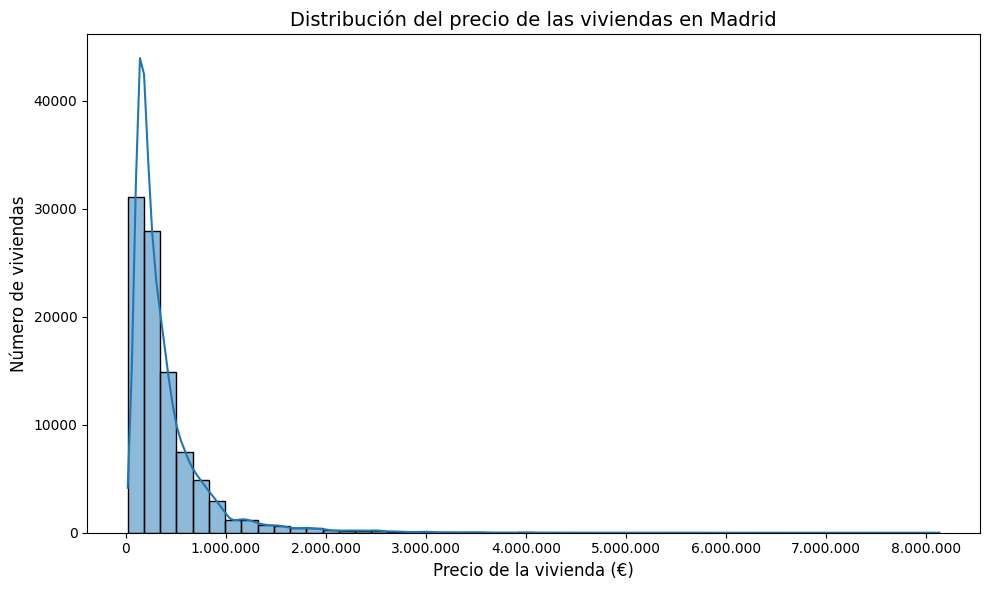

In [ ]:
#Histograma Price
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("/content/BBDD_FINAL.xlsx")

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="PRICE", bins=50, kde=True)

plt.title("Distribución del precio de las viviendas en Madrid", fontsize=14)
plt.xlabel("Precio de la vivienda (€)", fontsize=12)
plt.ylabel("Número de viviendas", fontsize=12)

from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, _: f'{int(x):,}'.replace(",", "."))
plt.gca().xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

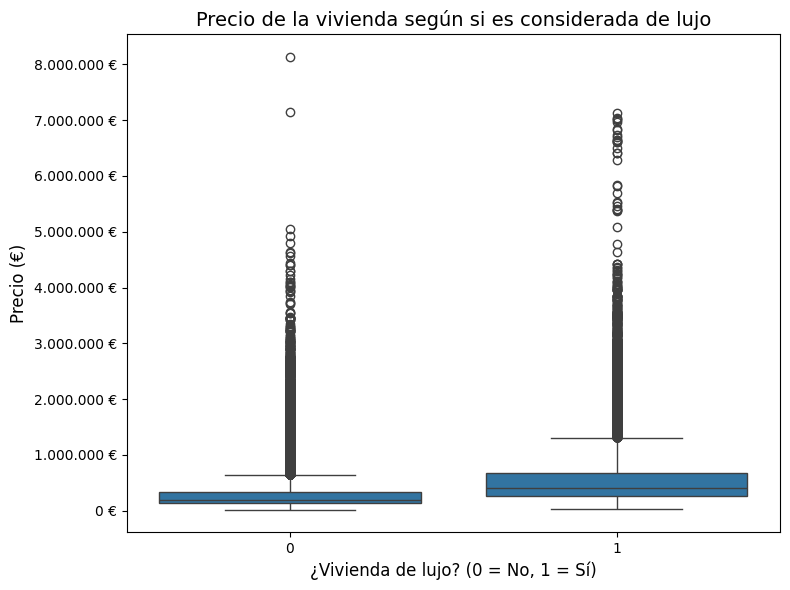

In [ ]:
#BOXPLOT PRECIO DE LA VIVIENDA SEGUN SI ES CONSIDERADA LUJO

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

df = pd.read_excel("/content/BBDD_FINAL.xlsx")

plt.figure(figsize=(8, 6))
sns.boxplot(x="LUJO", y="PRICE", data=df)

plt.title("Precio de la vivienda según si es considerada de lujo", fontsize=14)
plt.xlabel("¿Vivienda de lujo? (0 = No, 1 = Sí)", fontsize=12)
plt.ylabel("Precio (€)", fontsize=12)

formatter = FuncFormatter(lambda x, _: f'{int(x):,} €'.replace(",", "."))
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

<ipython-input-11-1128030454>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="NOMBRE_DISTRITO", data=df, order=df["NOMBRE_DISTRITO"].value_counts().index, palette="Blues_r")


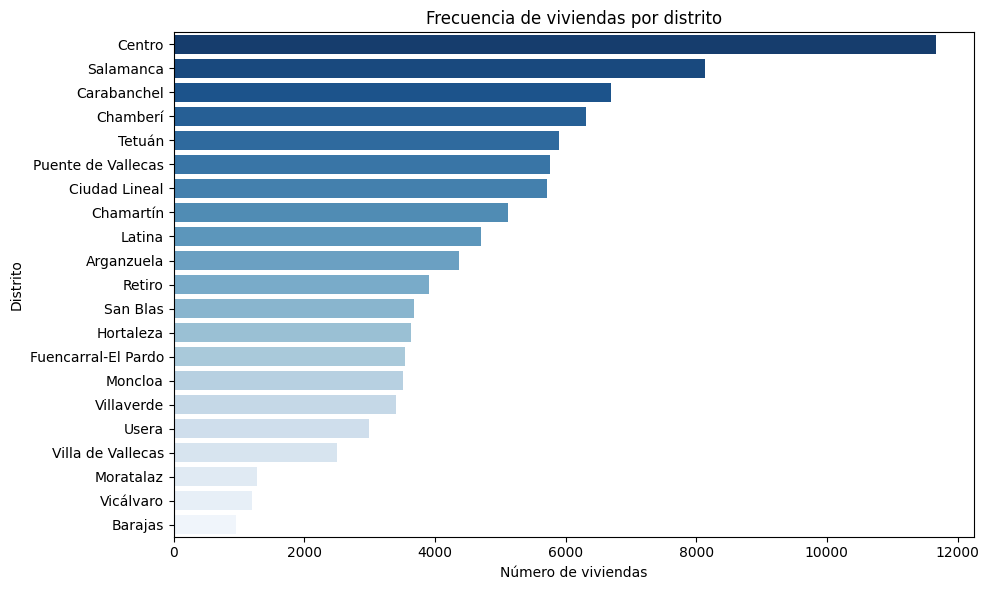

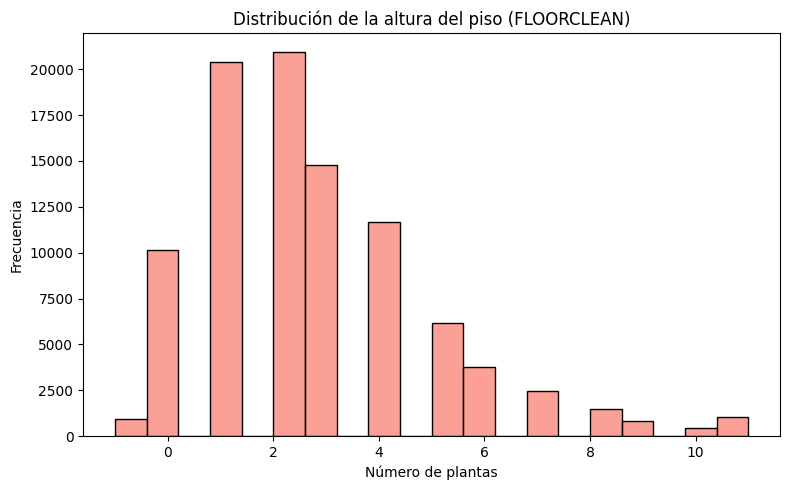

In [ ]:
#FRECUENCIA DE VIVIENDAS POR DISTRITO Y DISTRIBUCION ED ALTURA

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(y="NOMBRE_DISTRITO", data=df, order=df["NOMBRE_DISTRITO"].value_counts().index, palette="Blues_r")
plt.title("Frecuencia de viviendas por distrito")
plt.xlabel("Número de viviendas")
plt.ylabel("Distrito")
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="FLOORCLEAN", bins=20, kde=False, color="salmon")
plt.title("Distribución de la altura del piso (FLOORCLEAN)")
plt.xlabel("Número de plantas")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

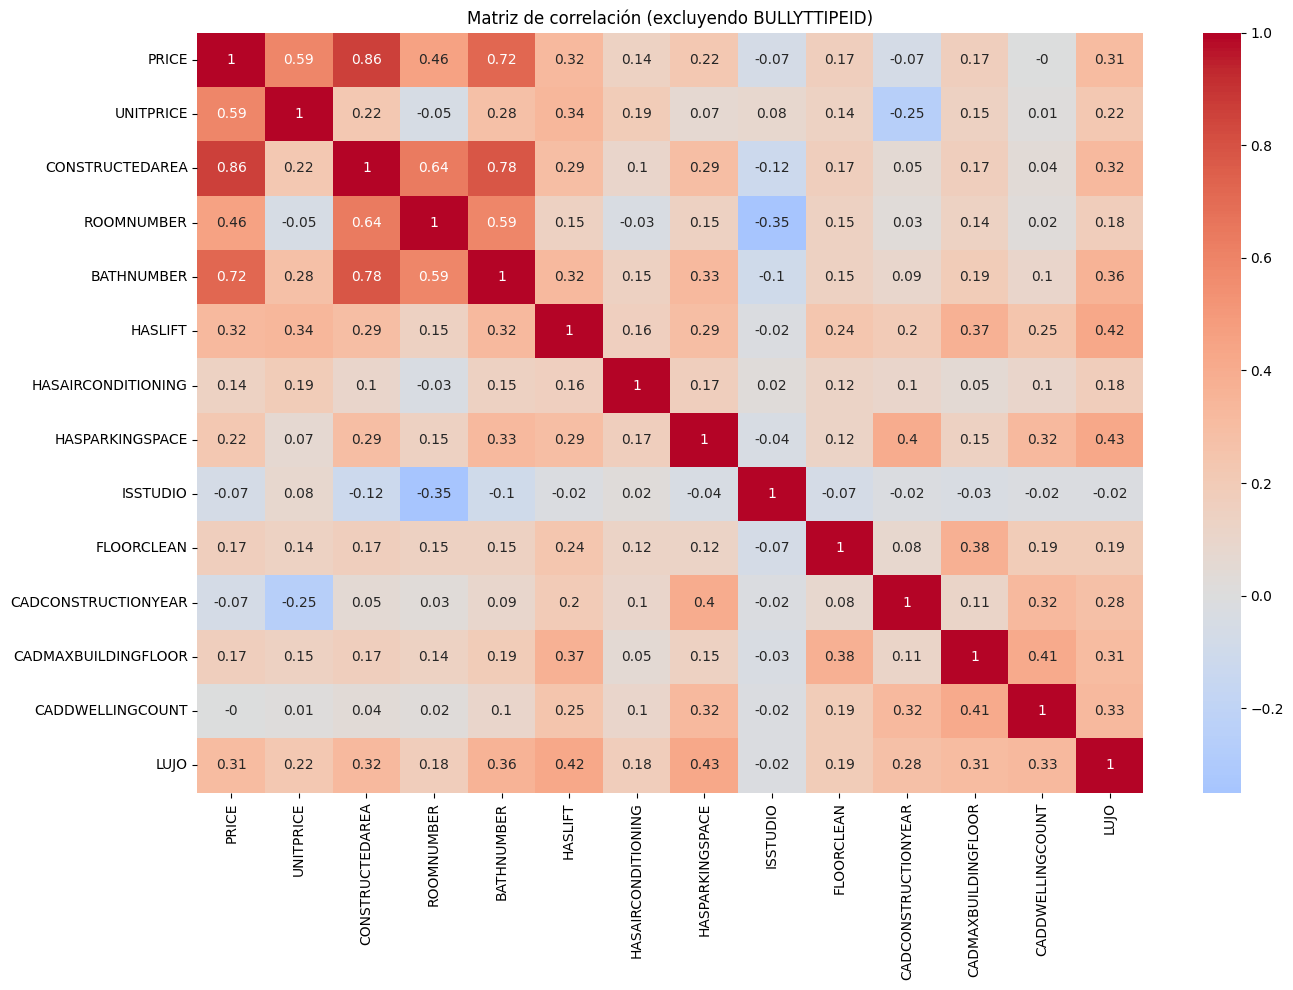

In [ ]:
#MATRIZ DE CORRELACION

import seaborn as sns
import matplotlib.pyplot as plt

numericas = df.select_dtypes(include="number")

numericas_filtradas = numericas.loc[:, ~numericas.columns.str.contains("BUILTTYPEID")]

correlation_matrix = numericas_filtradas.corr().round(2)

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de correlación (excluyendo BULLYTTIPEID)")
plt.tight_layout()
plt.show()

Saving BBDD_FINAL.xlsx to BBDD_FINAL (2).xlsx


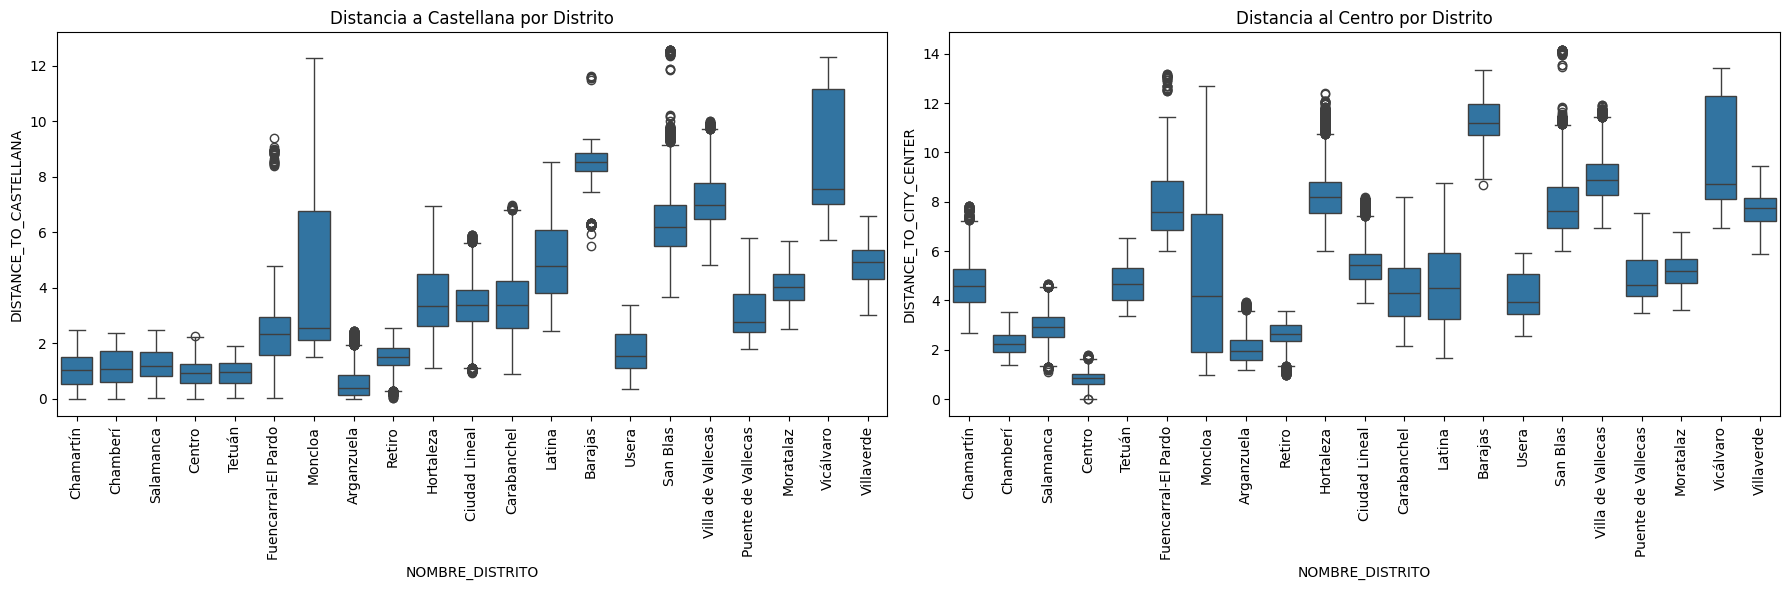

In [ ]:
#BOXPLOT DISTANCIA A LA CASTELLANA Y AL CENTRO POR DISTRITO

!pip install openpyxl

from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_excel("/content/BBDD_FINALGEOGRÁFICAS.xlsx")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='NOMBRE_DISTRITO', y='DISTANCE_TO_CASTELLANA')
plt.title("Distancia a Castellana por Distrito")
plt.xticks(rotation=90)


plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='NOMBRE_DISTRITO', y='DISTANCE_TO_CITY_CENTER')
plt.title("Distancia al Centro por Distrito")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()



------ MÉTRICAS TRAIN ------
MAE: 99,770.52 €
RMSE: 176,808.39 €
R²: 0.8242

------ MÉTRICAS TEST ------
MAE: 96,667.07 €
RMSE: 163,879.64 €
R²: 0.8312


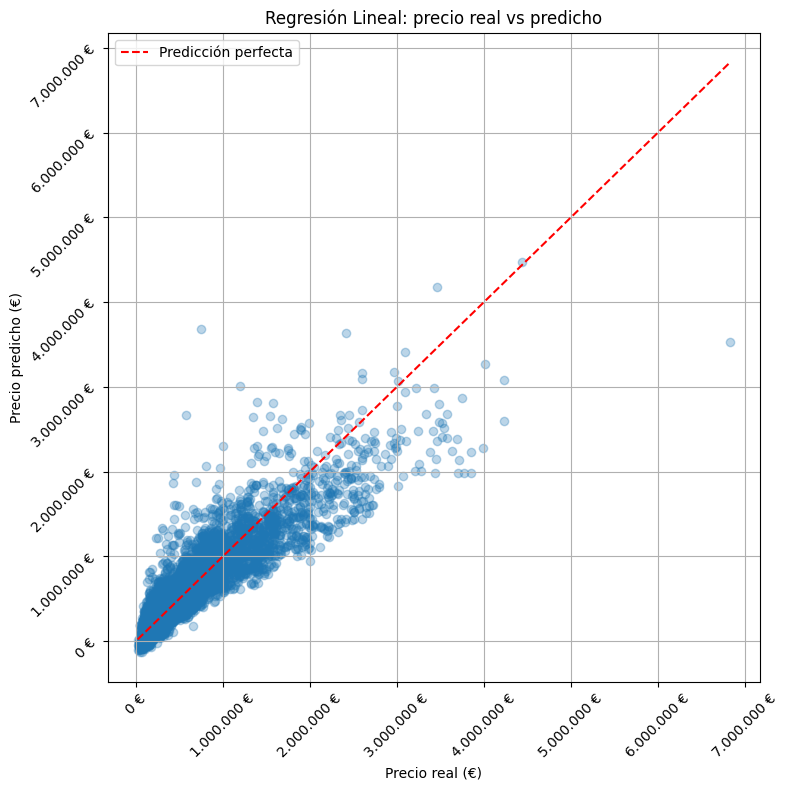

In [ ]:
#MODELO REGRESION LINEAL

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Cargar datos
df = pd.read_excel("/content/BBDD_FINAL.xlsx")

df = pd.get_dummies(df, drop_first=True)

df = df.drop(columns=["UNITPRICE"], errors="ignore")

X = df.drop(columns=["PRICE"])
y = df["PRICE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print("------ MÉTRICAS TRAIN ------")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):,.2f} €")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)) :,.2f} €")
print(f"R²: {r2_score(y_train, y_pred_train):.4f}")

print("\n------ MÉTRICAS TEST ------")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):,.2f} €")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)) :,.2f} €")
print(f"R²: {r2_score(y_test, y_pred_test):.4f}")

import matplotlib.ticker as ticker


plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_test, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Predicción perfecta')
plt.xlabel("Precio real (€)")
plt.ylabel("Precio predicho (€)")
plt.title("Regresión Lineal: precio real vs predicho")
plt.grid(True)
plt.legend()

formatter = ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.') + " €")
ax = plt.gca()
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)

plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.tight_layout()
plt.show()




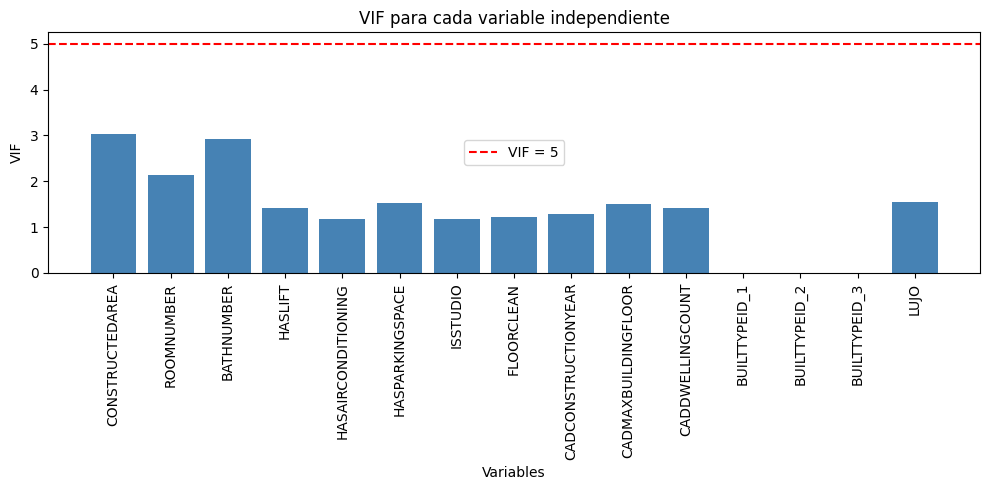

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant



X = df.drop(columns=["PRICE"], errors="ignore")

# 2. Limpiar: asegurarse de que todo es numérico, sin NaN ni Inf
X_clean = X.select_dtypes(include=[np.number]).copy()
X_clean = X_clean.replace([np.inf, -np.inf], np.nan).dropna()

# 3. Añadir constante
X_const = add_constant(X_clean)

# 4. Calcular VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# 5. Eliminar la constante de la tabla
vif_data = vif_data[vif_data["Variable"] != "const"]

# 6. Graficar
plt.figure(figsize=(10, 5))
plt.bar(vif_data["Variable"], vif_data["VIF"], color="steelblue")
plt.title("VIF para cada variable independiente")
plt.xlabel("Variables")
plt.ylabel("VIF")
plt.xticks(rotation=90)
plt.axhline(5, color='red', linestyle='--', label='VIF = 5')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#TABLA METRICAS REGRESION LINEAL

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# 1. Calcular las métricas
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_total = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_total  # por claridad semántica

# 2. Crear tabla en DataFrame
tabla_metricas = pd.DataFrame({
    "MÉTRICA": ["MAE", "RMSE", "R² TOTAL", "R² ENTRENAMIENTO", "R² PRUEBA"],
    "VALOR": [mae, rmse, r2_total, r2_train, r2_test]
})

# 3. Formatear y mostrar con estilo
tabla_metricas["VALOR"] = tabla_metricas["VALOR"].apply(
    lambda x: f"{x:,.2f} €" if isinstance(x, float) and x > 1 else f"{x:.4f}"
)

tabla_metricas = tabla_metricas.style.set_properties(**{
    'background-color': 'white',
    'color': 'black',
    'border-color': 'black',
    'text-align': 'center'
}).set_table_styles([{
    'selector': 'th',
    'props': [('font-weight', 'bold'), ('text-align', 'center')]
}])

# 4. Mostrar
display(tabla_metricas)


,MÉTRICA,VALOR
0,MAE,"96,667.07 €"
1,RMSE,"163,879.64 €"
2,R² TOTAL,0.8312
3,R² ENTRENAMIENTO,0.8242
4,R² PRUEBA,0.8312


------ MÉTRICAS TRAIN ------
MAE: 19,683.04 €
RMSE: 47,780.17 €
R²: 0.9872

------ MÉTRICAS TEST ------
MAE: 46,930.14 €
RMSE: 104,995.72 €
R²: 0.9307


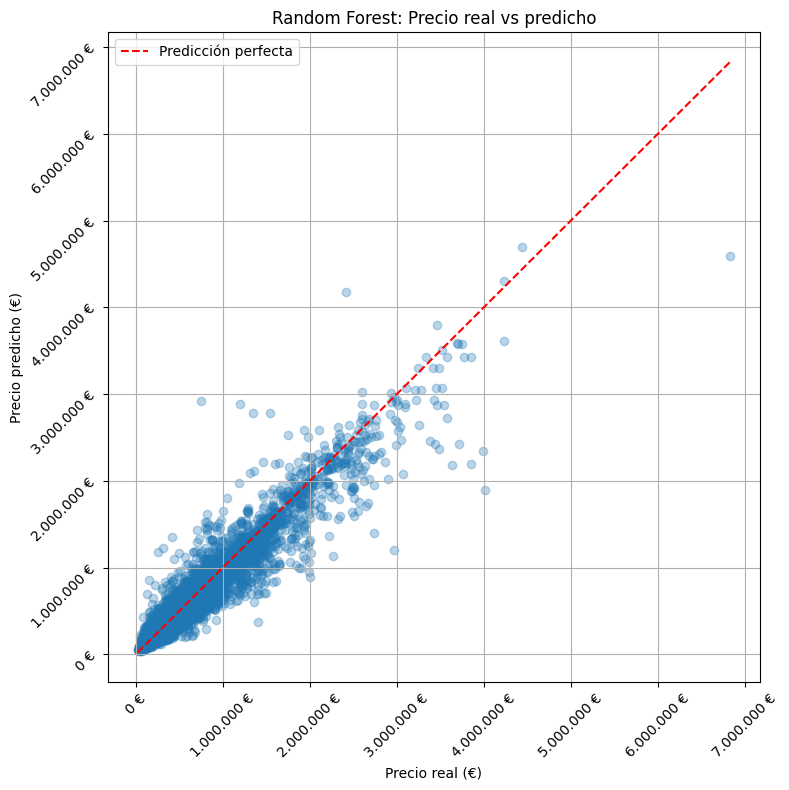

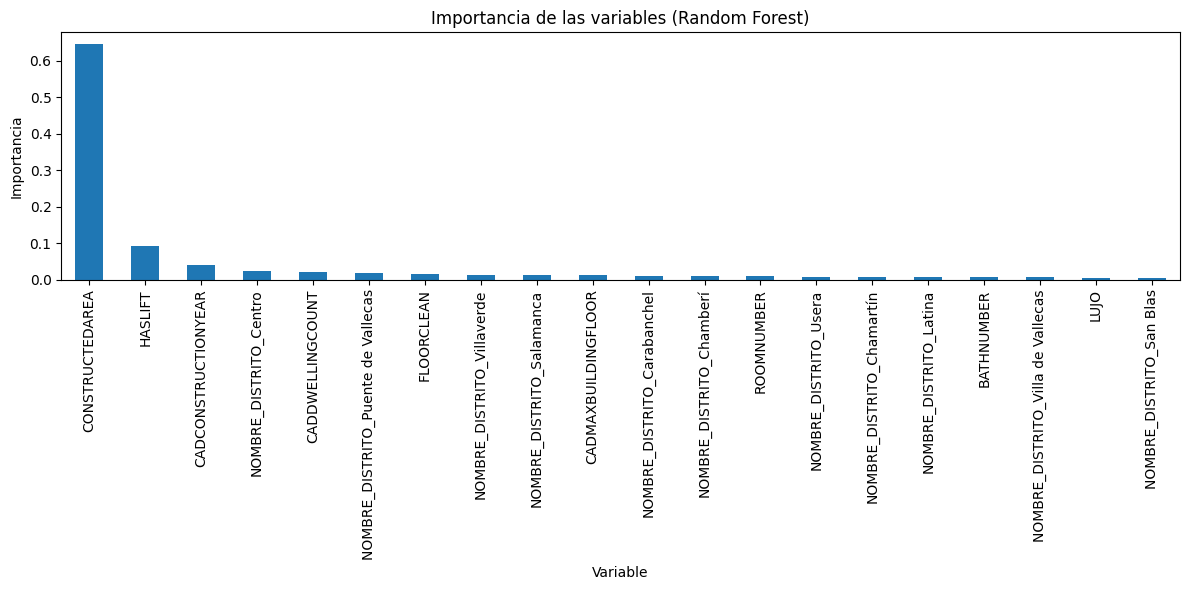

In [ ]:
#MODELO RANDOM FOREST

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

df = pd.read_excel("/content/BBDD_FINAL.xlsx")
df = pd.get_dummies(df, drop_first=True)
df = df.drop(columns=["UNITPRICE"], errors="ignore")

X = df.drop(columns=["PRICE"])
y = np.log1p(df["PRICE"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_train_log = rf.predict(X_train)
y_pred_test_log = rf.predict(X_test)

y_train_real = np.expm1(y_train)
y_test_real = np.expm1(y_test)
y_pred_train = np.expm1(y_pred_train_log)
y_pred_test = np.expm1(y_pred_test_log)

print("------ MÉTRICAS TRAIN ------")
print(f"MAE: {mean_absolute_error(y_train_real, y_pred_train):,.2f} €")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train_real, y_pred_train)) :,.2f} €")
print(f"R²: {r2_score(y_train_real, y_pred_train):.4f}")

print("\n------ MÉTRICAS TEST ------")
print(f"MAE: {mean_absolute_error(y_test_real, y_pred_test):,.2f} €")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_real, y_pred_test)) :,.2f} €")
print(f"R²: {r2_score(y_test_real, y_pred_test):.4f}")

from matplotlib.ticker import FuncFormatter

def formatear_miles(x, pos):
    return f"{int(x):,} €".replace(",", ".")

formatter = FuncFormatter(formatear_miles)

plt.figure(figsize=(8, 8))
plt.scatter(y_test_real, y_pred_test, alpha=0.3)
plt.plot([y_test_real.min(), y_test_real.max()],
         [y_test_real.min(), y_test_real.max()],
         'r--', label='Predicción perfecta')

plt.xlabel("Precio real (€)")
plt.ylabel("Precio predicho (€)")
plt.title("Random Forest: Precio real vs predicho")
plt.grid(True)
plt.legend()

ax = plt.gca()
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)

plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.tight_layout()
plt.show()

#importancia de variables random forest

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(20).plot(kind="bar", figsize=(12, 6))
plt.title("Importancia de las variables (Random Forest)")
plt.ylabel("Importancia")
plt.xlabel("Variable")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
# Cálculo de métricas
mae = mean_absolute_error(y_test_real, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test_real, y_pred_test))
r2_total = r2_score(y_test_real, y_pred_test)
r2_train = r2_score(y_train_real, y_pred_train)
r2_test = r2_total  # Por claridad

# Crear DataFrame con las métricas
metricas = pd.DataFrame({
    "MÉTRICA": ["MAE", "RMSE", "R² TOTAL", "R² ENTRENAMIENTO", "R² PRUEBA"],
    "VALOR": [
        f"{mae:,.2f} €".replace(",", "."),
        f"{rmse:,.2f} €".replace(",", "."),
        f"{r2_total:.4f}",
        f"{r2_train:.4f}",
        f"{r2_test:.4f}"
    ]
})

# Mostrar
display(metricas)


,MÉTRICA,VALOR
0,MAE,67.099.53 €
1,RMSE,130.610.69 €
2,R² TOTAL,0.8928
3,R² ENTRENAMIENTO,0.8937
4,R² PRUEBA,0.8928


------ MÉTRICAS TRAIN ------
MAE: 67,092.75 €
RMSE: 137,440.45 €
R²: 0.8937

------ MÉTRICAS TEST ------
MAE: 67,099.53 €
RMSE: 130,610.69 €
R²: 0.8928


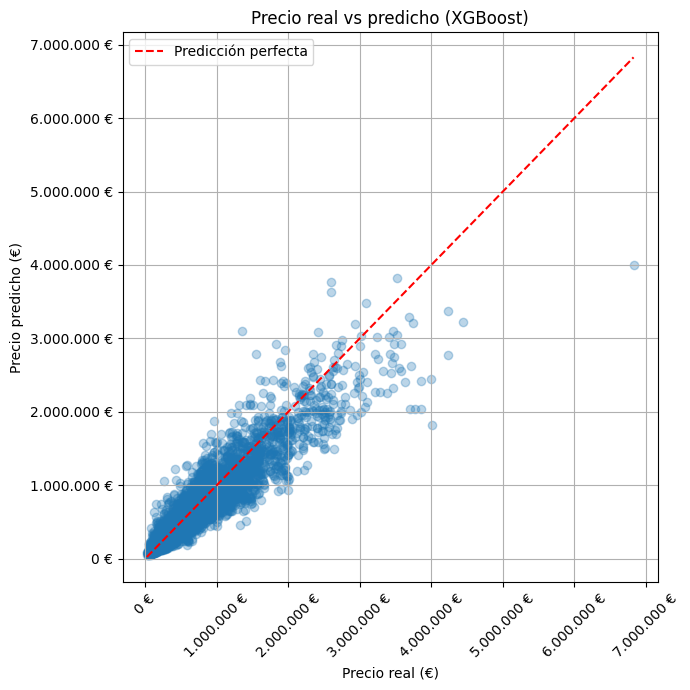

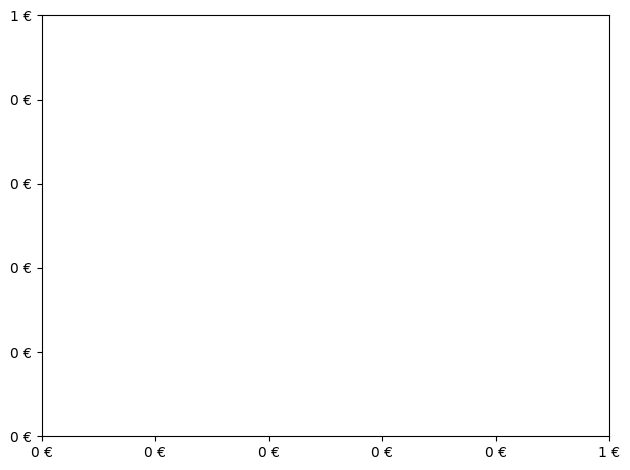

<Figure size 2000x1600 with 0 Axes>

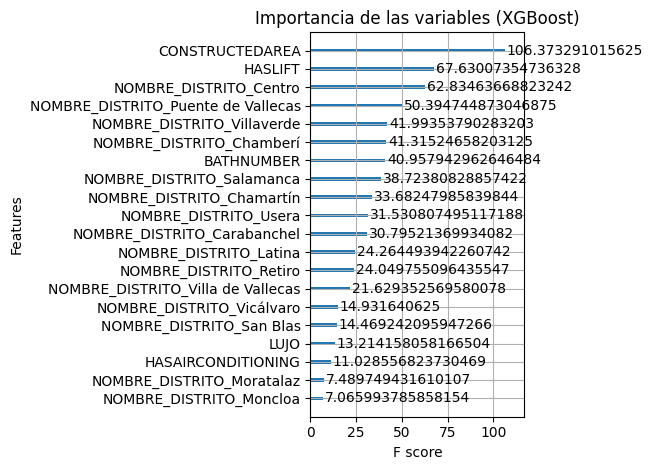

In [ ]:
#MODELO XGBOOST

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df = pd.read_excel("/content/BBDD_FINAL.xlsx")
df = pd.get_dummies(df, drop_first=True)
df = df.drop(columns=["UNITPRICE"], errors="ignore")

X = df.drop(columns=["PRICE"])
y = np.log1p(df["PRICE"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)

y_pred_train_log = xgb.predict(X_train)
y_pred_test_log = xgb.predict(X_test)

y_train_real = np.expm1(y_train)
y_test_real = np.expm1(y_test)
y_pred_train = np.expm1(y_pred_train_log)
y_pred_test = np.expm1(y_pred_test_log)

print("------ MÉTRICAS TRAIN ------")
print(f"MAE: {mean_absolute_error(y_train_real, y_pred_train):,.2f} €")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train_real, y_pred_train)):,.2f} €")
print(f"R²: {r2_score(y_train_real, y_pred_train):.4f}")

print("\n------ MÉTRICAS TEST ------")
print(f"MAE: {mean_absolute_error(y_test_real, y_pred_test):,.2f} €")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_real, y_pred_test)):,.2f} €")
print(f"R²: {r2_score(y_test_real, y_pred_test):.4f}")

from matplotlib.ticker import FuncFormatter

def formatear_euros(x, pos):
    return f"{int(x):,} €".replace(",", ".")

plt.figure(figsize=(7, 7))
plt.scatter(y_test_real, y_pred_test, alpha=0.3)
plt.plot([y_test_real.min(), y_test_real.max()],
         [y_test_real.min(), y_test_real.max()], 'r--', label='Predicción perfecta')

plt.xlabel("Precio real (€)")
plt.ylabel("Precio predicho (€)")
plt.title("Precio real vs predicho (XGBoost)")

plt.gca().xaxis.set_major_formatter(FuncFormatter(formatear_euros))
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatear_euros))

plt.xticks(rotation=45)

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


plt.gca().xaxis.set_major_formatter(FuncFormatter(formatear_euros))
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatear_euros))

plt.tight_layout()
plt.show()


# 10. Gráfico de importancia de variables
plt.figure(figsize=(20, 16))
plot_importance(xgb, max_num_features=20, importance_type="gain")
plt.title("Importancia de las variables (XGBoost)")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

+mae = mean_absolute_error(y_test_real, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test_real, y_pred_test))
r2_total = r2_score(y_test_real, y_pred_test)
r2_train = r2_score(y_train_real, y_pred_train)
r2_test = r2_total

tabla_metricas_xgb = pd.DataFrame({
    "MÉTRICA": ["MAE", "RMSE", "R² TOTAL", "R² ENTRENAMIENTO", "R² PRUEBA"],
    "VALOR": [mae, rmse, r2_total, r2_train, r2_test]
})

tabla_metricas_xgb["VALOR"] = tabla_metricas_xgb["VALOR"].apply(
    lambda x: f"{x:,.2f} €" if isinstance(x, float) and x > 1 else f"{x:.4f}"
)

tabla_metricas_xgb = tabla_metricas_xgb.style.set_properties(**{
    'background-color': 'white',
    'color': 'black',
    'border-color': 'black',
    'text-align': 'center'
}).set_table_styles([{
    'selector': 'th',
    'props': [('font-weight', 'bold'), ('text-align', 'center')]
}])

display(tabla_metricas_xgb)


,MÉTRICA,VALOR
0,MAE,"67,099.53 €"
1,RMSE,"130,610.69 €"
2,R² TOTAL,0.8928
3,R² ENTRENAMIENTO,0.8937
4,R² PRUEBA,0.8928


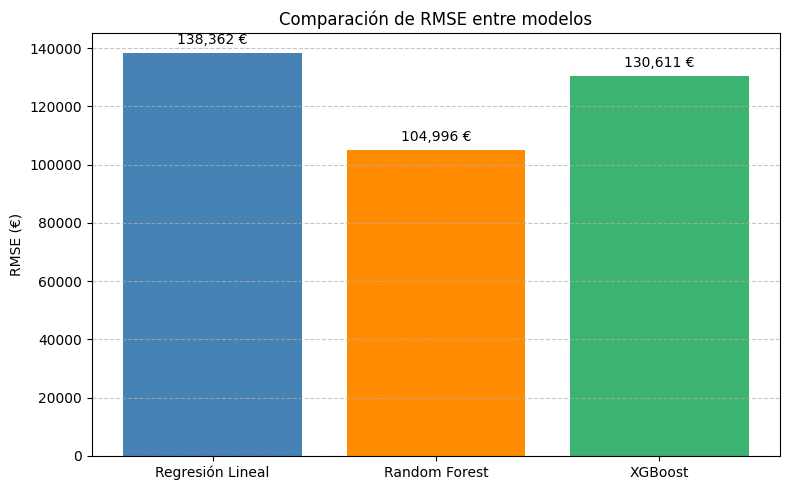

In [ ]:
import matplotlib.pyplot as plt

models = ['Regresión Lineal', 'Random Forest', 'XGBoost']
rmse_values = [138362, 104996, 130611]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, rmse_values, color=['steelblue', 'darkorange', 'mediumseagreen'])

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2000, f"{bar.get_height():,.0f} €",
             ha='center', va='bottom', fontsize=10)

plt.title("Comparación de RMSE entre modelos")
plt.ylabel("RMSE (€)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


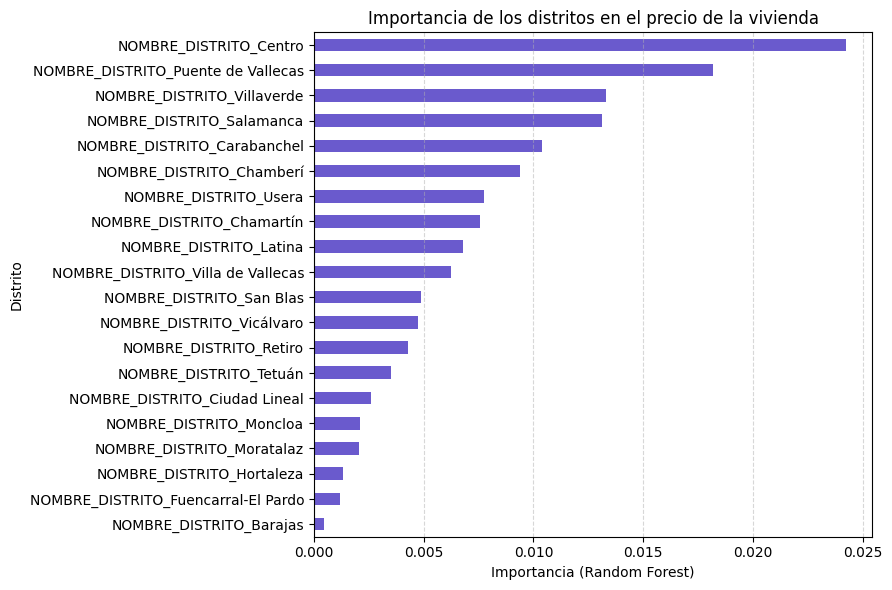

In [ ]:
import matplotlib.pyplot as plt

# Filtrar solo las variables de distrito (ajusta si usas otro nombre)
importancias_distritos = importances.filter(like="NOMBRE_DISTRITO")
importancias_distritos = importancias_distritos.sort_values(ascending=True)

# Crear el gráfico
plt.figure(figsize=(9, 6))
importancias_distritos.plot(kind='barh', color='slateblue')
plt.title("Importancia de los distritos en el precio de la vivienda")
plt.xlabel("Importancia (Random Forest)")
plt.ylabel("Distrito")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

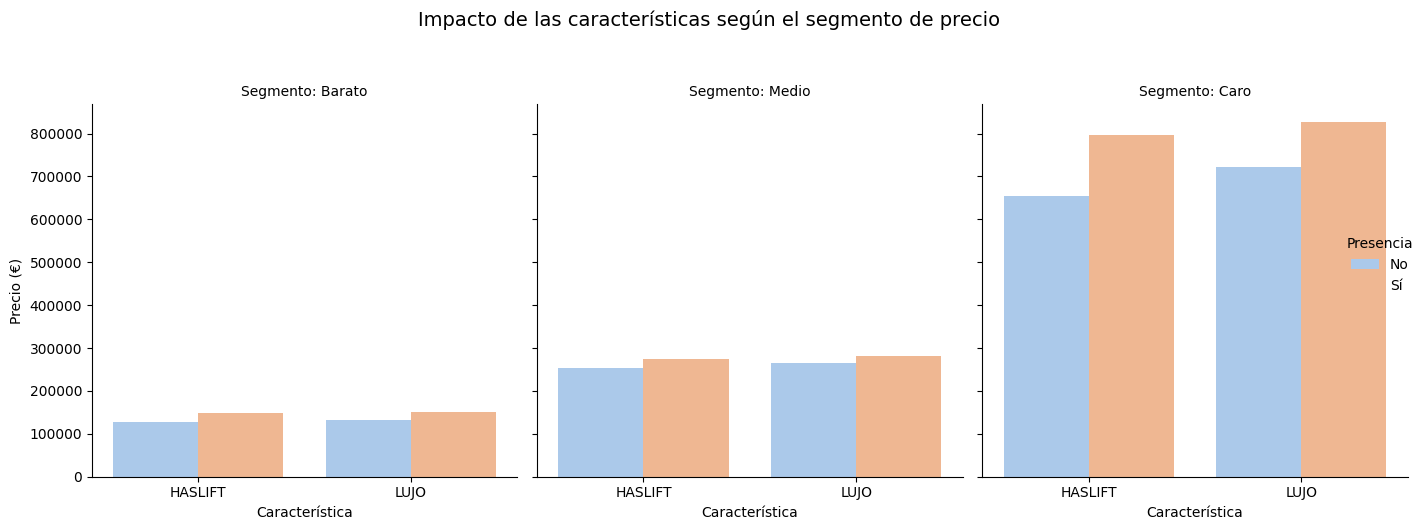

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Crear variable de segmento de precio
df["RANGO_PRECIO"] = pd.qcut(df["PRICE"], q=3, labels=["Barato", "Medio", "Caro"])

binarias = ['HASLIFT', 'LUJO']

tabla = pd.DataFrame()

for var in binarias:
    temp = df.groupby([var, "RANGO_PRECIO"])["PRICE"].mean().unstack().T
    temp.columns = [f"{var}_0", f"{var}_1"]
    tabla = pd.concat([tabla, temp], axis=1)

tabla = tabla.reset_index().melt(id_vars="RANGO_PRECIO", var_name="Variable", value_name="Precio")
tabla["Característica"] = tabla["Variable"].str.extract(r'(HASLIFT|LUJO)')
tabla["Presencia"] = tabla["Variable"].str.extract(r'_(\d)').replace({"0": "No", "1": "Sí"})

g = sns.catplot(
    data=tabla,
    x="Característica", y="Precio", hue="Presencia",
    col="RANGO_PRECIO", kind="bar", height=5, aspect=0.9, palette="pastel"
)

g.set_titles("Segmento: {col_name}")
g.set_axis_labels("Característica", "Precio (€)")
g.fig.suptitle("Impacto de las características según el segmento de precio", fontsize=14, y=1.05)
plt.tight_layout()
plt.show()
